## Task2:  Prediction Using Decision Tree

## Author : Raj Suryakant Bhor

## GRIP The Sparks Foundation
### In this task we will use Decision Tree Algorithm and predict the species of the flower using their sepal length, width and petal length,width

In [79]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [80]:
# importing Data
iris = pd.read_csv('iris.csv',index_col=0)

In [81]:
# checking Data
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
# Doing Label Encoding on Target
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species']) 

In [83]:
# spliting Features and Target
x=iris.iloc[:,0:4]
y=iris['Species']

In [84]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [85]:
y

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int32

In [86]:
# checking Unique Values 
iris['Species'].unique()

array([0, 1, 2])

In [87]:
# counts of the data
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [88]:
# seeing Column namess
colnames = list(iris.columns)
colnames

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

## Decision Tree Regression 

In [101]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [102]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [107]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [111]:
#Find the accuracy
model.score(X_test,y_test)

0.8547994957377837

[Text(0.34470274390243905, 0.9545454545454546, 'X[2] <= 2.6\nsquared_error = 0.601\nsamples = 100\nvalue = 1.204'),
 Text(0.10365853658536585, 0.8636363636363636, 'X[1] <= 3.25\nsquared_error = 0.013\nsamples = 33\nvalue = 0.227'),
 Text(0.036585365853658534, 0.7727272727272727, 'X[1] <= 2.6\nsquared_error = 0.003\nsamples = 14\nvalue = 0.171'),
 Text(0.024390243902439025, 0.6818181818181818, 'squared_error = 0.0\nsamples = 1\nvalue = 0.3'),
 Text(0.04878048780487805, 0.6818181818181818, 'X[0] <= 4.75\nsquared_error = 0.002\nsamples = 13\nvalue = 0.162'),
 Text(0.024390243902439025, 0.5909090909090909, 'X[2] <= 1.2\nsquared_error = 0.001\nsamples = 6\nvalue = 0.183'),
 Text(0.012195121951219513, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 0.1'),
 Text(0.036585365853658534, 0.5, 'squared_error = 0.0\nsamples = 5\nvalue = 0.2'),
 Text(0.07317073170731707, 0.5909090909090909, 'X[2] <= 1.55\nsquared_error = 0.002\nsamples = 7\nvalue = 0.143'),
 Text(0.06097560975609756, 0.5, 'X[2] <= 1

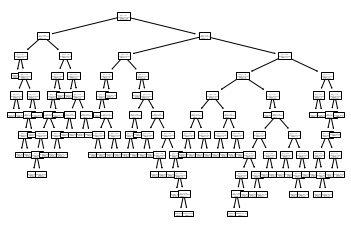

In [110]:
tree.plot_tree(model)

### Building Decision Tree Classifier using Entropy Criteria

In [89]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [90]:
# buliding model
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

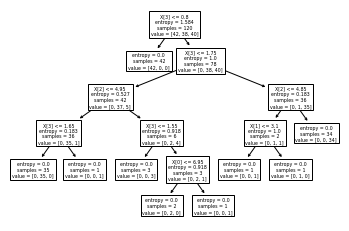

In [91]:
#PLot the decision tree
tree.plot_tree(model);


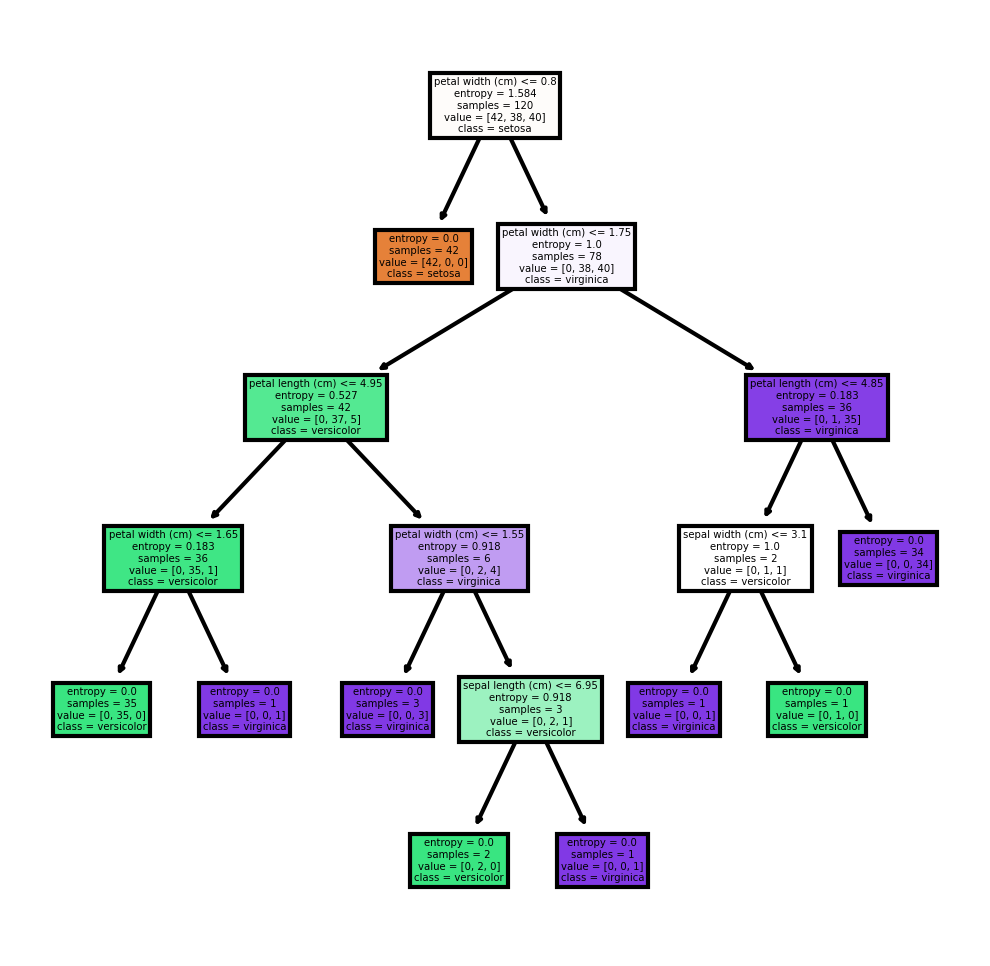

In [92]:
# ploting tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [93]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    12
2    10
0     8
dtype: int64

In [94]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [95]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [96]:
# Accuracy 
np.mean(preds==y_test)

1.0

### Building Decision Tree Classifier (CART) using Gini Criteria

In [98]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini')

In [99]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [100]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0